In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

In [2]:
folder = "D:/Documents/datasets/"
df1_file = folder + "XSSTraining.csv"
df1 = pd.read_csv(df1_file, na_values="?")

print(df1.shape)

(19122, 66)


In [3]:
df1.columns

Index(['Contains &lt', 'ScripTag', 'Readable', 'Contains "><', 'Contains '><',
       'Contains And', 'Contains Percentage', 'Contains Slash',
       'Contains BackSlash', 'Contains Plus', 'Contains Document',
       'Contains Window', 'Contains Onload', 'Contains Onerror',
       'Contains DIV', 'Contains iframe', 'Contains img', 'Contains SRC',
       'Containss Var', 'Contains Eval', 'Contains href', 'Contains Cookie',
       'Contains StringfromCharCode', 'Contains Single Quote',
       'Contains Question Mark', 'Contains Exclamation Mark',
       'Contains Semicolon', 'Contains HTTP', 'Contains JS', 'Contains Hash',
       'Contains Equal', 'Contains Open Bracket', 'Contains Close Bracket',
       'Contains Duble Bracket', 'Contains Dollar',
       'Contains Open Parenthesis', 'Contains Close Parenthesis',
       'Contains Asterisk', 'Contains Comma', 'Contains Hyphen',
       'Contains Less Than', 'Contains Greater Than', 'Contains At',
       'Contains Underscore', 'Contains loc

In [4]:
df1.shape

(19122, 66)

In [5]:
# remove Contains StringfromCharCode, Contains js, Open Brace, Close Brace, 
# Contains Qutions, Contains Power, Contains Break Line, letters ratio, symbols ratio

df1.drop('Readable', axis=1, inplace=True)
df1.drop('Contains StringfromCharCode', axis=1, inplace=True)
df1.drop('Contains JS', axis=1, inplace=True)
df1.drop('Contains Open Brace', axis=1, inplace=True)
df1.drop('Contains Close Brace', axis=1, inplace=True)
df1.drop('Contains Qutions', axis=1, inplace=True)
df1.drop('Contains Power', axis=1, inplace=True)
df1.drop('Contains Break Line', axis=1, inplace=True)
df1.drop('Letters Ratio', axis=1, inplace=True)
df1.drop('Numbuers Ratio', axis=1, inplace=True)
df1.drop('Symbols Ratio', axis=1, inplace=True)


In [6]:
df1.shape

(19122, 55)

In [7]:
df1['Class'].value_counts()

Benign       13972
Malicious     5150
Name: Class, dtype: int64

In [8]:
replace_Class = {"Class": {"Malicious": 1, "Benign": 0}}

In [9]:
df1 = df1.replace(replace_Class)
df1

,Contains &lt,ScripTag,"Contains ""><",Contains '><,Contains And,Contains Percentage,Contains Slash,Contains BackSlash,Contains Plus,Contains Document,...,Contains Dots,Contains tilde,Contains Spase,Contains Grave,Contains Duble Equals,Contains Duble Slash,Contains Vertical Bar,Contains Broken Bar,Contains Alert,Class
0,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,1
3,0,1,0,0,1,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19117,0,1,0,0,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,1
19118,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
19119,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19120,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [10]:
df1['Class'].value_counts()

0    13972
1     5150
Name: Class, dtype: int64

In [11]:
X = df1.drop('Class', axis=1)
y = df1['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.28,stratify=y)

In [12]:
y_train.value_counts()

0    10059
1     3708
Name: Class, dtype: int64

In [13]:
models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('NN', MLPClassifier(random_state=1)))
#models.append(('RFC', RandomForestClassifier(random_state=1)))

In [14]:


#hypterparameters for SVM
SVM_param_dict = {
    "C": [50, 10, 1.0, 0.1, 0.01],
    "kernel": ['poly', 'rbf', 'sigmoid'],
    "gamma": ['scale']
}


#hypterparameters for MLPClassifier
NN_param_dict = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    
    'learning_rate': ['constant','adaptive']
}

#hypterparameters for MLPClassifier
RFC_param_dict = {
    'max_depth': [5, 8, 15, 25, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 300, 500, 800, 1200]
}

In [15]:

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    param_dict = name + '_param_dict'
    grid = GridSearchCV(model,
                       param_grid=eval(param_dict),
                       cv=kfold,
                       verbose=1,
                       n_jobs=-1,
                       scoring='roc_auc')
    grid.fit(X_train, y_train)
    print('%s: %s %f' % (name,grid.best_estimator_, grid.best_score_))
    grid_predictions = grid.predict(X_test)
    roc = roc_auc_score(y_test, grid_predictions)
    print('roc', roc)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


SVM: SVC() 0.999175
roc 0.9873889375469868
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.1min finished


NN: MLPClassifier(alpha=0.05, random_state=1) 0.999489
roc 0.9868418440895298


In [16]:
df1.shape

(19122, 55)

In [17]:
#load test data


df2_file = folder + "XSSPayloads2.csv"
df2 = pd.read_csv(df2_file, na_values="?")
    
df2.shape

(6606, 54)

In [18]:
df2

,Contains &lt,ScripTag,"Contains ""><",Contains '><,Contains And,Contains Percentage,Contains Slash,Contains BackSlash,Contains Plus,Contains Document,...,Contains Colon,Contains Dots,Contains tilde,Contains Spase,Contains Grave,Contains Duble Equals,Contains Duble Slash,Contains Vertical Bar,Contains Broken Bar,Contains Alert
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6602,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6604,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
model1 = SVC(C=10)
model1.fit(X_train, y_train)
m1_predictions = model1.predict(df2)

In [20]:
print(len(m1_predictions), np.sum(m1_predictions))

6606 6524


In [21]:
model2 = MLPClassifier(alpha=0.05, random_state=1)
model2.fit(X_train, y_train)
m2_predictions = model2.predict(df2)

In [22]:
print(len(m2_predictions), np.sum(m2_predictions))

6606 6495


In [24]:
model3 = RandomForestClassifier(random_state=1)
model3.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)
roc = roc_auc_score(y_test, grid_predictions)

m3_predictions = model3.predict(df2)

In [25]:
print('roc RandomForestClassifier', roc)

roc RandomForestClassifier 0.9868418440895298


In [26]:
print(f"Total: {len(m3_predictions)}, Detected: {np.sum(m3_predictions)}")

Total: 6606, Detected: 6544


In [47]:
X_train.columns.values

array(['Contains &lt', 'ScripTag', 'Contains "><', "Contains '><",
       'Contains And', 'Contains Percentage', 'Contains Slash',
       'Contains BackSlash', 'Contains Plus', 'Contains Document',
       'Contains Window', 'Contains Onload', 'Contains Onerror',
       'Contains DIV', 'Contains iframe', 'Contains img', 'Contains SRC',
       'Containss Var', 'Contains Eval', 'Contains href',
       'Contains Cookie', 'Contains Single Quote',
       'Contains Question Mark', 'Contains Exclamation Mark',
       'Contains Semicolon', 'Contains HTTP', 'Contains Hash',
       'Contains Equal', 'Contains Open Bracket',
       'Contains Close Bracket', 'Contains Duble Bracket',
       'Contains Dollar', 'Contains Open Parenthesis',
       'Contains Close Parenthesis', 'Contains Asterisk',
       'Contains Comma', 'Contains Hyphen', 'Contains Less Than',
       'Contains Greater Than', 'Contains At', 'Contains Underscore',
       'Contains location', 'Contains Search', 'Contains &#',
       'C

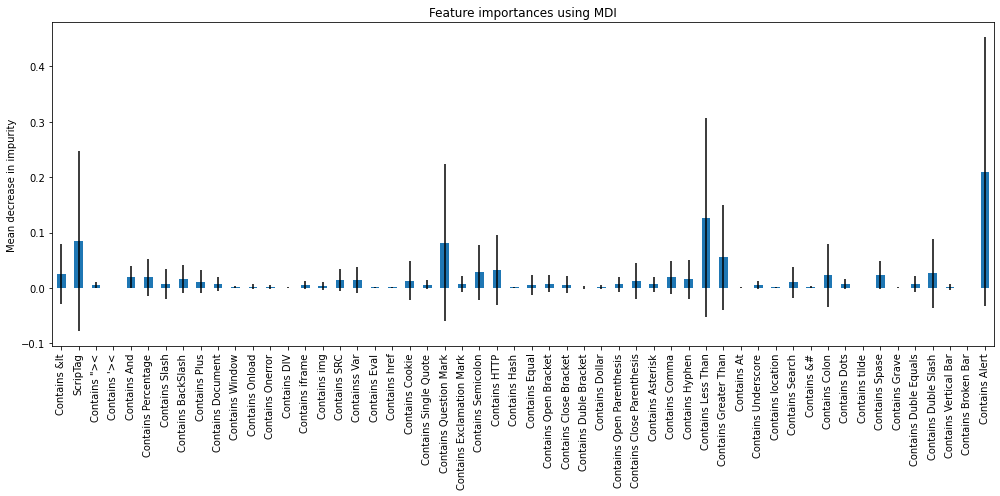

In [50]:
#feature importance for RandomForest
from matplotlib import pyplot as plt
feature_names = X_train.columns.values # replace with list of feature names?

importances = model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

fig.set_size_inches(14, 7)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()